<a href="https://colab.research.google.com/github/ArchitGupta-IITB/StockMarket-ARIMA-Model-/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install numpy pandas seaborn matplotlib yfinance scipy statsmodels pmdarima --quiet

     |████████████████████████████████| 1.4 MB 40.5 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
     |████████████████████████████████| 6.4 MB 65.3 MB/s 
     |████████████████████████████████| 9.8 MB 25.0 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
pip install -U statsmodels --quiet

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf 
import scipy
import statsmodels.api as sm

[*********************100%***********************]  1 of 1 completed


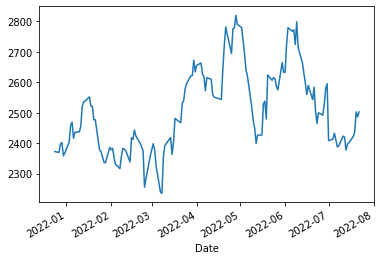

In [ ]:
rel_6m= yf.download("RELIANCE.NS",start="2021-12-24",end="2022-07-24")
rel_6m["Close"].plot()
#rel_6m.index = pd.DatetimeIndex(rel_6m.index).to_period('M')

[*********************100%***********************]  1 of 1 completed


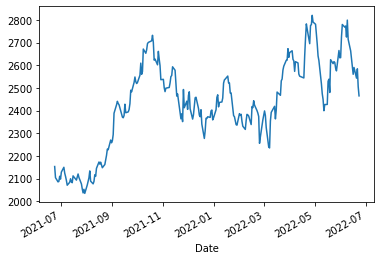

In [ ]:
rel_1y= yf.download("RELIANCE.NS",start="2021-06-24",end="2022-06-24")
rel_1y["Close"].plot()

In [ ]:
rel_6m[rel_6m.isna().any(axis=1)]
rel_6m1=rel_6m.dropna()

In [ ]:
rel_1y[rel_1y.isna().any(axis=1)]
rel_1y1=rel_1y.dropna()

In [ ]:
rel_6m2=rel_6m1.groupby('Date')[['Close']].mean()

In [ ]:
rel_1y2=rel_1y1.groupby('Date')[['Close']].mean()

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


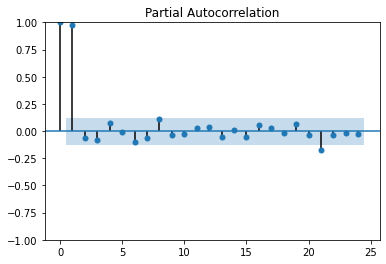

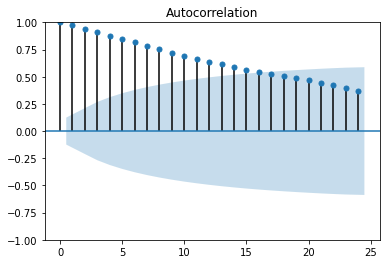

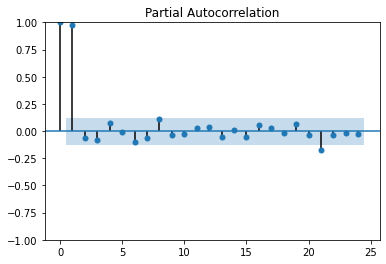

In [ ]:
sm.graphics.tsa.plot_acf(rel_1y2)
sm.graphics.tsa.plot_pacf(rel_1y2)

In [ ]:
import statsmodels
from statsmodels.tsa.stattools import adfuller
adfuller(rel_6m2['Close'])

(-2.2447736986734457,
 0.19039815200235738,
 0,
 144,
 {'1%': -3.476597917537401,
  '10%': -2.5775887982253085,
  '5%': -2.8818291230495543},
 1380.2601383345382)

In [ ]:
adfuller(rel_1y2['Close'])

(-2.032876630469023,
 0.2723464276637104,
 0,
 248,
 {'1%': -3.4569962781990573,
  '10%': -2.573018897632674,
  '5%': -2.8732659015936024},
 2406.2058826717985)

In [ ]:
rel_6m2['Close_Difference']=rel_6m2['Close']-rel_6m2['Close'].shift(1)
rel_6m2['Close'].shift(1)
rel_6m2

,Close,Close First Difference,Close_Difference
Date,,,
2021-12-24,2372.800049,NaN,NaN
2021-12-27,2370.250000,-2.550049,-2.550049
2021-12-28,2398.399902,28.149902,28.149902
2021-12-29,2402.500000,4.100098,4.100098
2021-12-30,2359.100098,-43.399902,-43.399902
...,...,...,...
2022-07-18,2422.250000,20.449951,20.449951
2022-07-19,2437.100098,14.850098,14.850098
2022-07-20,2503.000000,65.899902,65.899902


In [ ]:
adfuller(rel_6m2['Close First Difference'].dropna())

(-11.504233032619918,
 4.415705644988403e-21,
 0,
 143,
 {'1%': -3.4769274060112707,
  '10%': -2.577665408088415,
  '5%': -2.8819726324025625},
 1374.6656672974418)

In [ ]:
rel_1y2['Close First Difference']=rel_1y2['Close']-rel_1y2['Close'].shift(1)
rel_1y2['Close'].shift(1)
rel_1y2
adfuller(rel_1y2['Close First Difference'].dropna())

(-15.434616451631989,
 2.9181366048244936e-28,
 0,
 247,
 {'1%': -3.457105309726321,
  '10%': -2.5730443824681606,
  '5%': -2.873313676101283},
 2402.2319188202864)

(-11.504233032619918, 4.415705644988403e-21, 0, 143, {'1%': -3.4769274060112707, '5%': -2.8819726324025625, '10%': -2.577665408088415}, 1374.6656672974418)


Text(0, 0.5, 'Price')

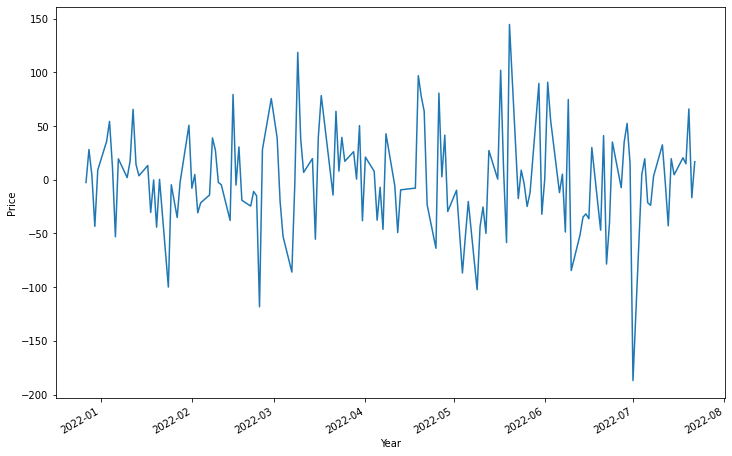

In [ ]:
print(adfuller(rel_6m2['Close First Difference'].dropna()))
rel_6m2['Close First Difference'].plot(figsize=(12,8))
plt.xlabel("Year")
plt.ylabel("Price")


(-15.434616451631989, 2.9181366048244936e-28, 0, 247, {'1%': -3.457105309726321, '5%': -2.873313676101283, '10%': -2.5730443824681606}, 2402.2319188202864)


Text(0, 0.5, 'Price')

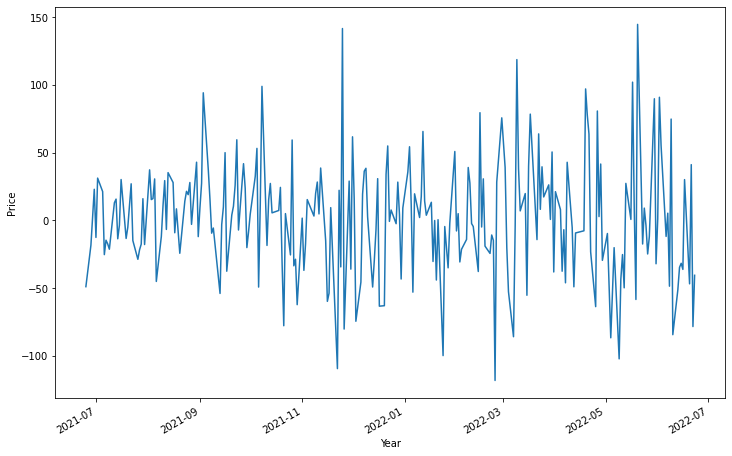

In [ ]:
print(adfuller(rel_1y2['Close First Difference'].dropna()))
rel_1y2['Close First Difference'].plot(figsize=(12,8))
plt.xlabel("Year")
plt.ylabel("Price")

In [ ]:
import pmdarima
rel_6m_stepwisefit=pmdarima.arima.auto_arima(rel_6m2["Close"],trace=True,suppress_warnings=True)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.05 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1525.088, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1526.949, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1526.948, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1523.140, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1528.949, Time=0.16 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.470 seconds


In [ ]:
rel_1y_stepwisefit=pmdarima.arima.auto_arima(rel_1y2['Close'].dropna(),trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2565.862, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2567.810, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2567.815, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2564.080, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2569.748, Time=0.47 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 2.071 seconds


In [ ]:
rel_life= yf.download("RELIANCE.NS")

[*********************100%***********************]  1 of 1 completed


In [ ]:
rel_stepwisefit=pmdarima.arima.auto_arima(rel_['Close'].dropna(),trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=55565.565, Time=10.65 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=55598.249, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=55599.565, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=55599.591, Time=0.61 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=55599.966, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=55597.054, Time=4.66 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=55597.826, Time=5.30 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=55576.533, Time=11.26 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=55576.357, Time=7.97 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=55601.344, Time=3.38 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=55583.981, Time=4.73 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=55584.777, Time=3.98 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=55577.868, Time=11.67 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=55567.157, Time=3.80 sec

Best model:  AR

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
#import statsmodels.api as sy
rel_6m_model=ARIMA(rel_6m2['Close'],order=(2,1,2))
rel_6m_result=rel_6m_model.fit()
print(rel_6m_result.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/l

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  145
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -757.110
Date:                Thu, 28 Jul 2022   AIC                           1524.221
Time:                        16:36:46   BIC                           1539.070
Sample:                             0   HQIC                          1530.255
                                - 145                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1411      0.055      2.582      0.010       0.034       0.248
ar.L2         -0.8846      0.074    -11.911      0.000      -1.030      -0.739
ma.L1         -0.1028      0.197     -0.521      0.6

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [ ]:
rel_life

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-01,15.859429,15.944529,15.754989,15.917452,10.509539,48051995
1996-01-02,15.878770,15.956133,15.677626,15.793671,10.427809,77875009
1996-01-03,16.052837,16.783918,15.878770,15.913584,10.506984,96602936
1996-01-04,15.762726,15.813012,15.553845,15.766594,10.409934,100099436
1996-01-05,15.704703,15.704703,15.522900,15.658285,10.338420,76935930
...,...,...,...,...,...,...
2022-07-22,2500.000000,2516.300049,2495.000000,2503.100098,2503.100098,5062651
2022-07-25,2467.449951,2467.449951,2403.000000,2420.399902,2420.399902,10665470
2022-07-26,2421.100098,2443.899902,2411.350098,2421.500000,2421.500000,5216466


In [ ]:
rel_6m2["Forecast"]=rel_6m_result.predict(start=0,end=len(rel_life),type="Close")
#rel_6m2[["Close","Forecast"]].plot()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates=[rel_6m2.index[-1]+ DateOffset(days=x)for x in range(0,60)]

In [ ]:
future_dataset_df=pd.DataFrame(index=future_dates[1:],columns=rel_6m2.columns)
future_dataset_df

,Close,Close First Difference,Close_Difference,Forecast
2022-07-23,NaN,NaN,NaN,NaN
2022-07-24,NaN,NaN,NaN,NaN
2022-07-25,NaN,NaN,NaN,NaN
2022-07-26,NaN,NaN,NaN,NaN
2022-07-27,NaN,NaN,NaN,NaN
2022-07-28,NaN,NaN,NaN,NaN
2022-07-29,NaN,NaN,NaN,NaN
2022-07-30,NaN,NaN,NaN,NaN
2022-07-31,NaN,NaN,NaN,NaN
2022-08-01,NaN,NaN,NaN,NaN


In [ ]:
pred=pd.concat([rel_6m2,future_dataset_df])
pred
#pred["Forecast"]=rel_6m_result.predict(start="2022-06-20",end="2022-09-19",type="Close")
#y=pred["Close"]
#y.plot()
#pred.tail()

,Close,Close First Difference,Close_Difference,Forecast
2021-12-24,2372.800049,NaN,NaN,NaN
2021-12-27,2370.250000,-2.550049,-2.550049,NaN
2021-12-28,2398.399902,28.149902,28.149902,NaN
2021-12-29,2402.500000,4.100098,4.100098,NaN
2021-12-30,2359.100098,-43.399902,-43.399902,NaN
...,...,...,...,...
2022-09-15,NaN,NaN,NaN,NaN
2022-09-16,NaN,NaN,NaN,NaN
2022-09-17,NaN,NaN,NaN,NaN
2022-09-18,NaN,NaN,NaN,NaN
